In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, tests_carried_out, daily_vaccinations, population_vaccinated, unique_people_tested
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
102,100 cases (7 day average) as of Sun 26 Dec, +2,737.4 since Sat 25 Dec
1,590 hospitalised (7 day average) as of Wed 29 Dec, +160.6 since Tue 28 Dec
88 died (7 day average) as of Sun 26 Dec, +5.9 since Sat 25 Dec


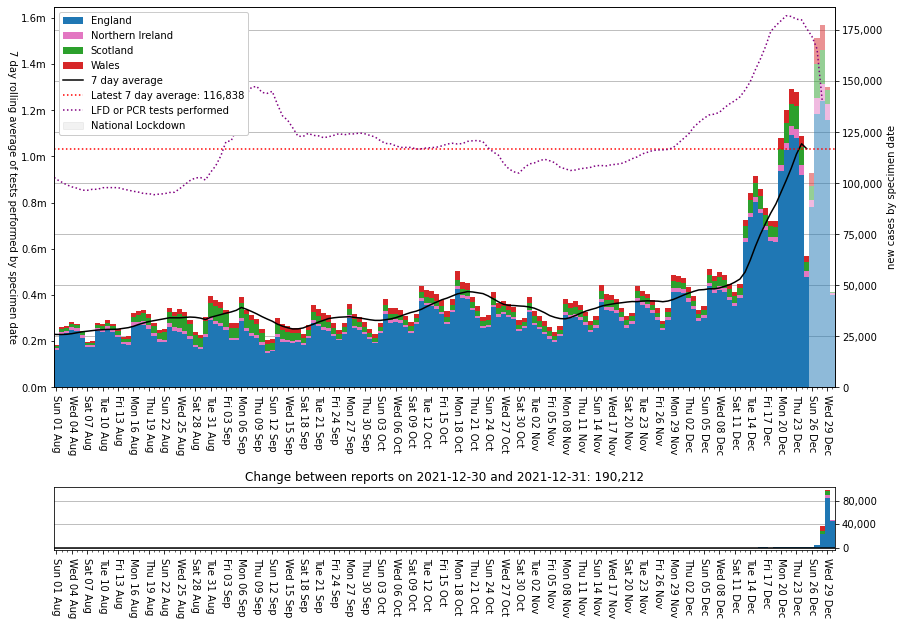

In [3]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b', earliest='2021-08', diff_ylims=None)

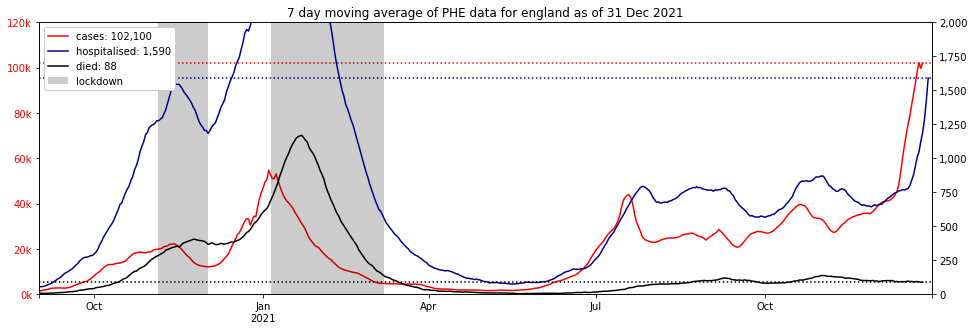

In [18]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=120_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=2000)

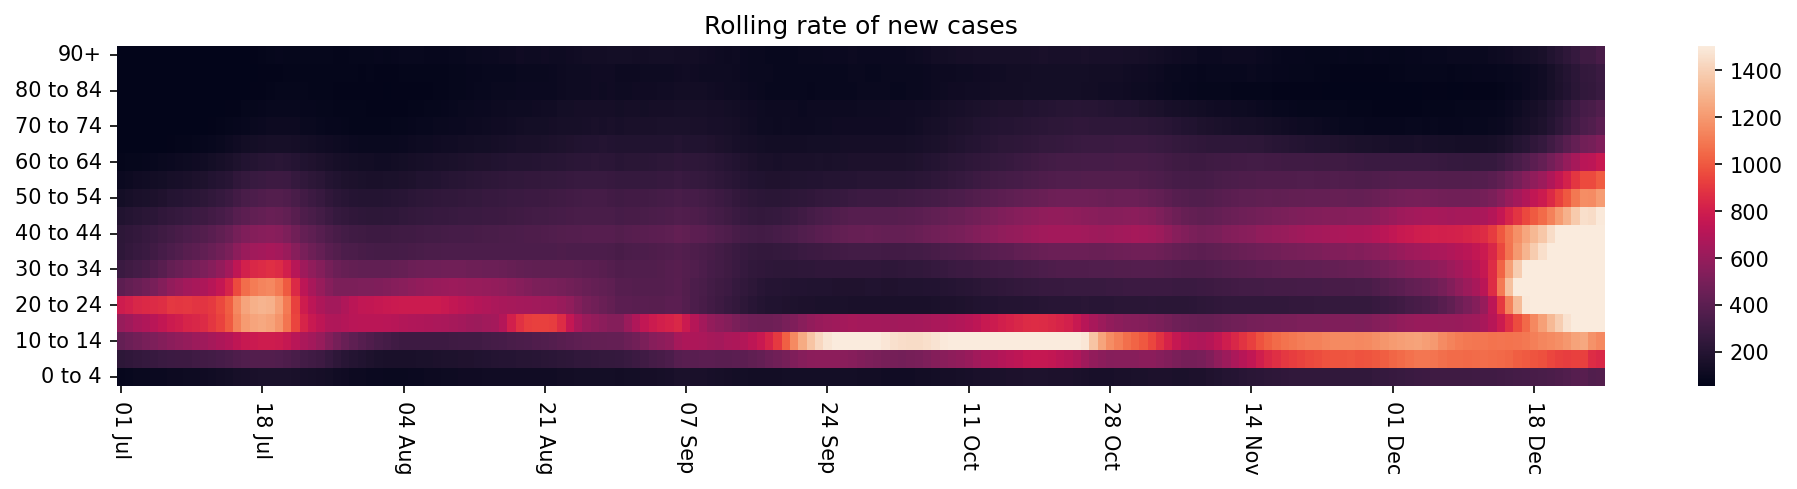

In [5]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2021-07')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

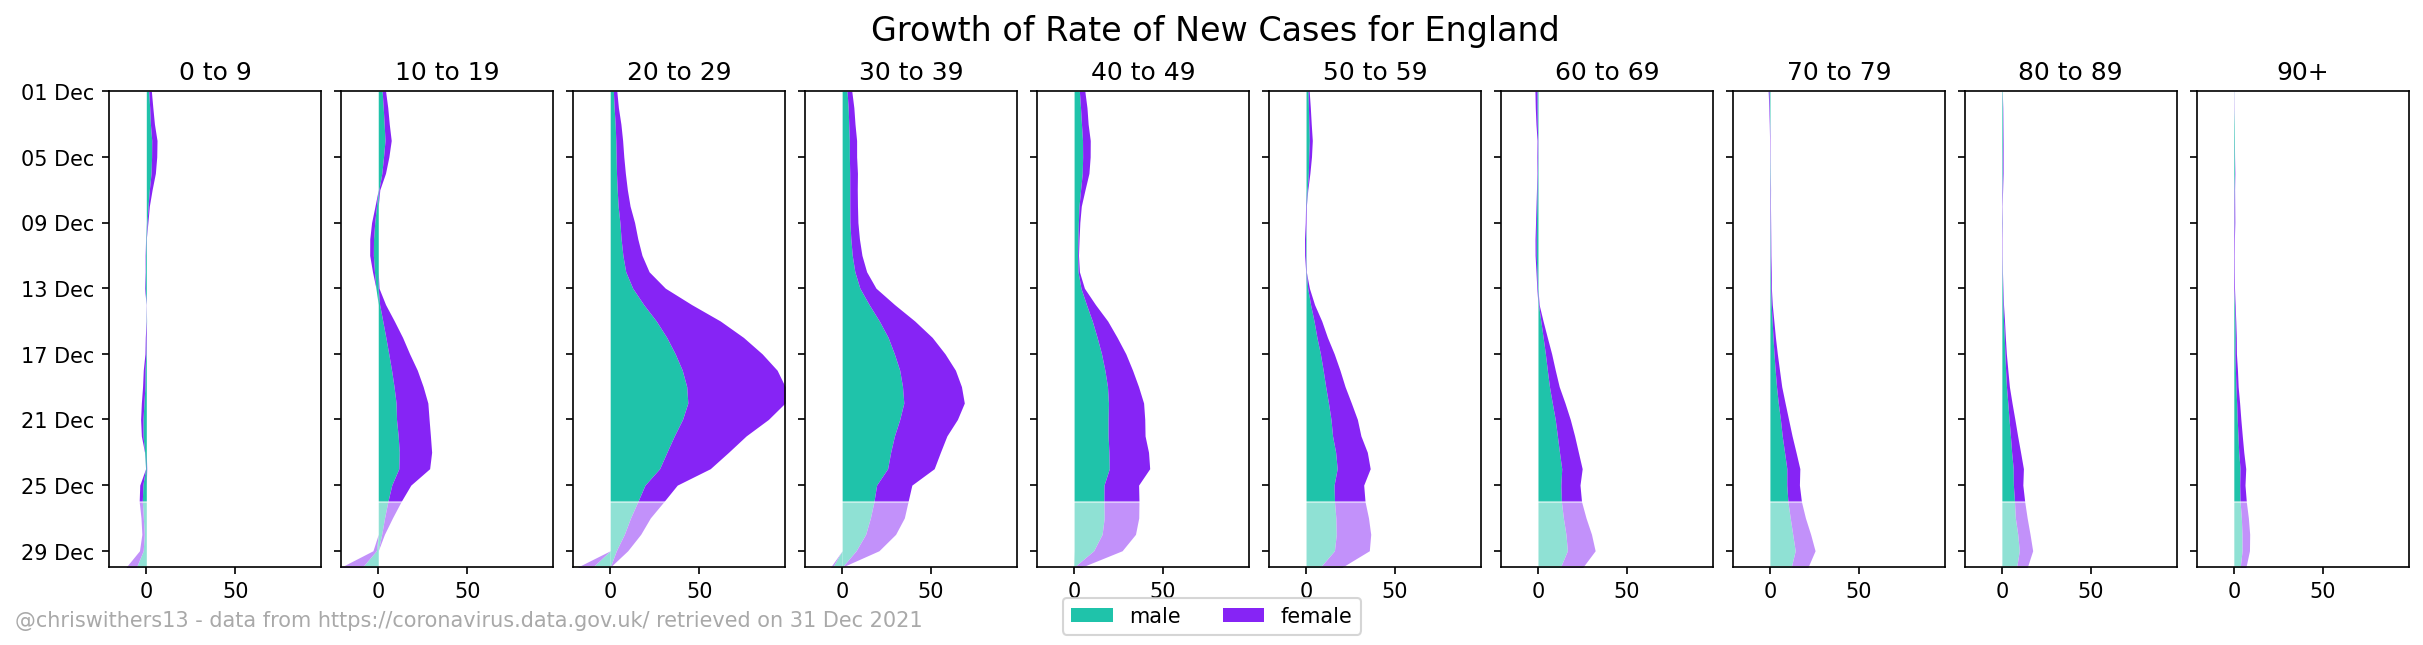

In [6]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

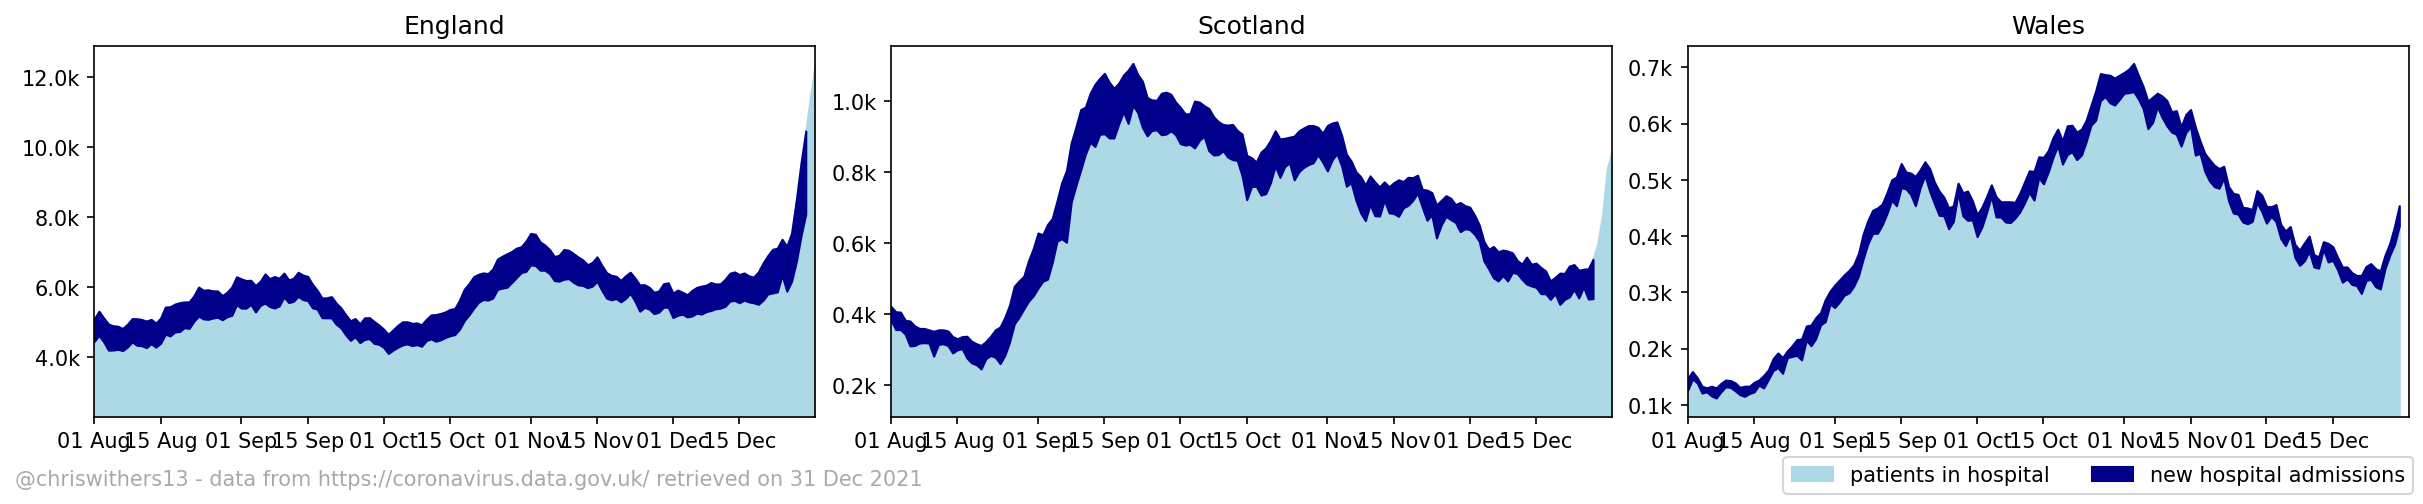

In [7]:
hospital_plot(start='2021-08', figsize=(16,3), figs=(1, 3), ymin=None)

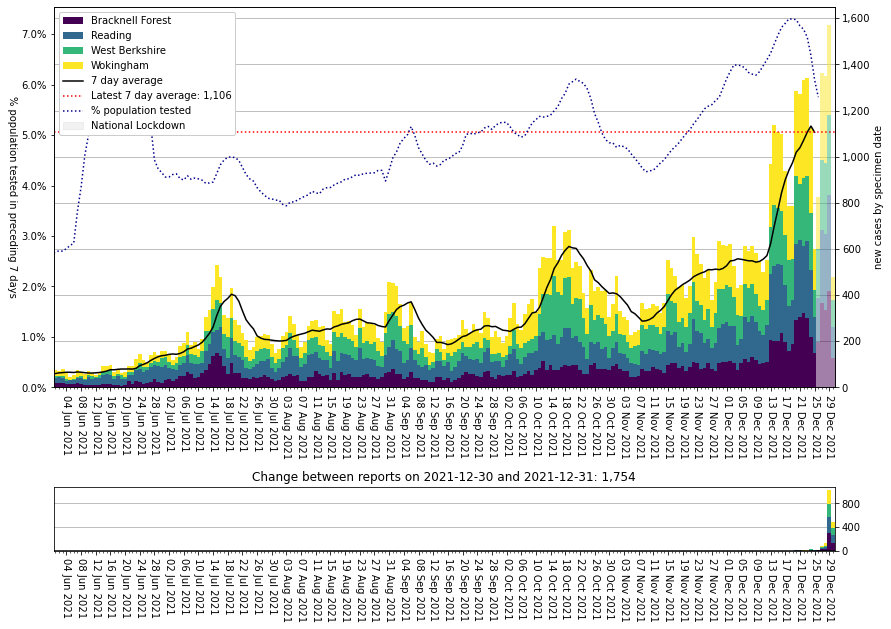

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

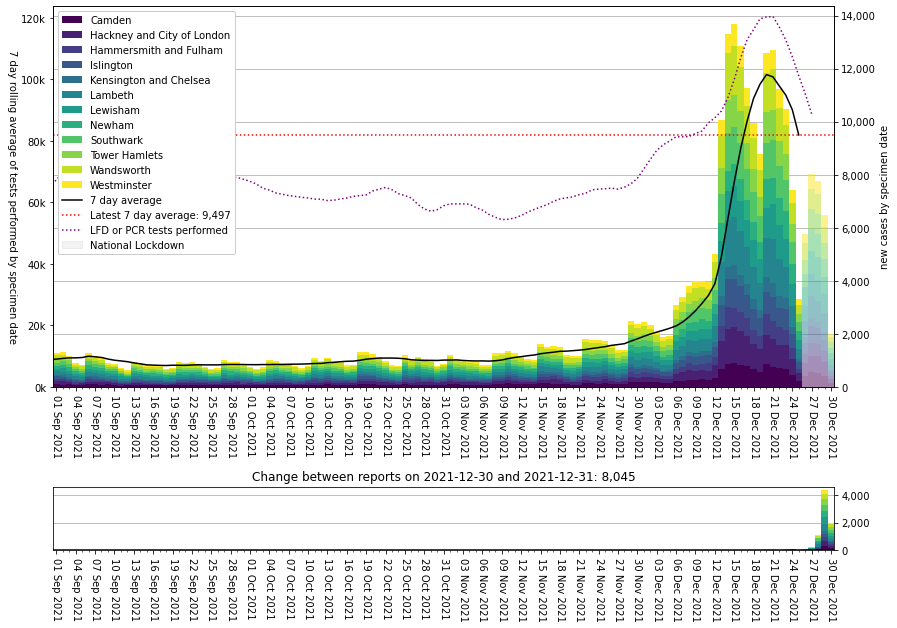

In [9]:
plot_areas(for_date, areas=london_areas, earliest='2021-09', lines=tests_carried_out)

In [10]:
data = recent_cases_summed(days=7, exclude_days=1)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
N09000005  Derry City and Strabane         3164.247376   
N09000006      Fermanagh and Omagh         2564.801486   
E07000027        Barrow-in-Furness         2204.358007   
N09000010   Newry, Mourne and Down         2059.348948   
E06000034                 Thurrock         2041.975210   
N09000003                  Belfast         2031.483778   
E07000029                 Copeland         2028.364842   
E07000034             Chesterfield         2020.019066   
E08000007                Stockport         1991.323107   
E07000073                   Harlow         1968.598895   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
N09000005                  4787.0    2021-12-29  
N09000006                  3011.0    2021-12-29  
E07000027                  1478.0    2021-12-29  
N09000010                  3735.0    2021-12-29  
E06000034                  3560.0    2021-12-29  
N09000003                  6979.0    2021-12-29  
E07000029                  1383.0    2021-12-29  
E07000034                  2119.0    2021-12-29  
E08000007                  5843.0    2021-12-29  
E07000073                  1714.0    2021-12-29

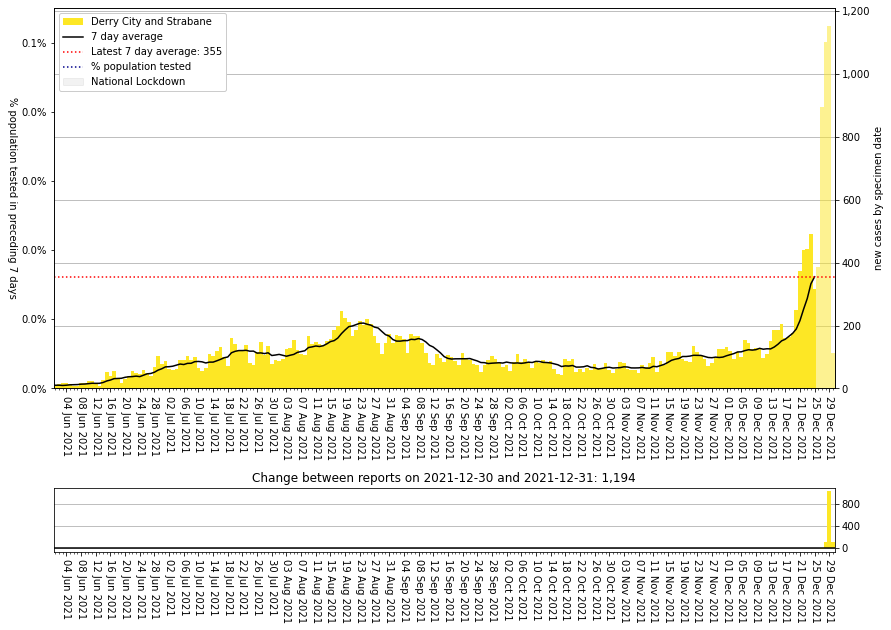

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  newCasesBySpecimenDate  \
areaCode                                                                   
E08000025         Birmingham         1129.428910                 12896.0   
E08000035              Leeds         1323.475456                 10497.0   
S12000049       Glasgow City         1565.737933                  9913.0   
E08000003         Manchester         1676.922465                  9271.0   
E08000019          Sheffield         1490.630979                  8718.0   
E08000012          Liverpool         1620.144486                  8069.0   
S12000036  City of Edinburgh         1384.946564                  7270.0   
E09000008            Croydon         1841.690155                  7122.0   
N09000003            Belfast         2031.483778                  6979.0   
E06000023   Bristol, City of         1429.937179                  6626.0   

          Specimen date  
areaCode                 
E08000025    2021-12-29  
E08000035    2021-12-29  
S12000049    2021-12-29  
E08000003    2021-12-29  
E08000019    2021-12-29  
E08000012    2021-12-29  
S12000036    2021-12-29  
E09000008    2021-12-29  
N09000003    2021-12-29  
E06000023    2021-12-29

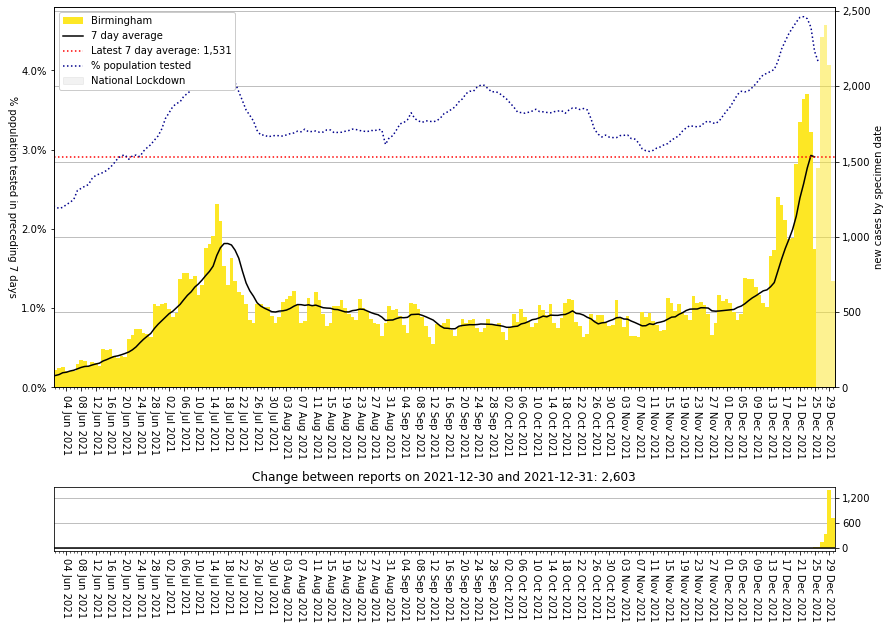

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

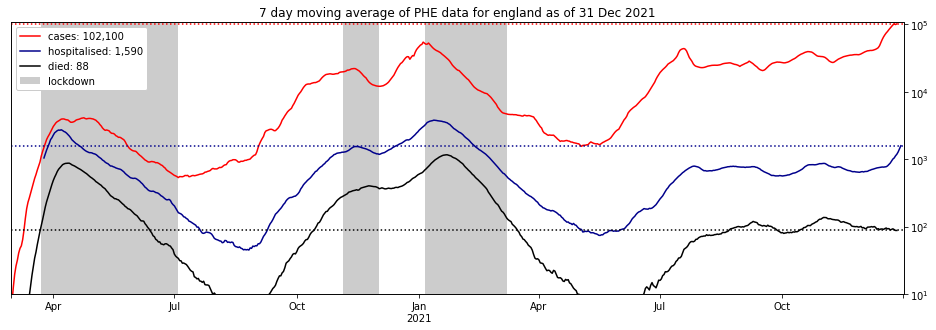

In [15]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

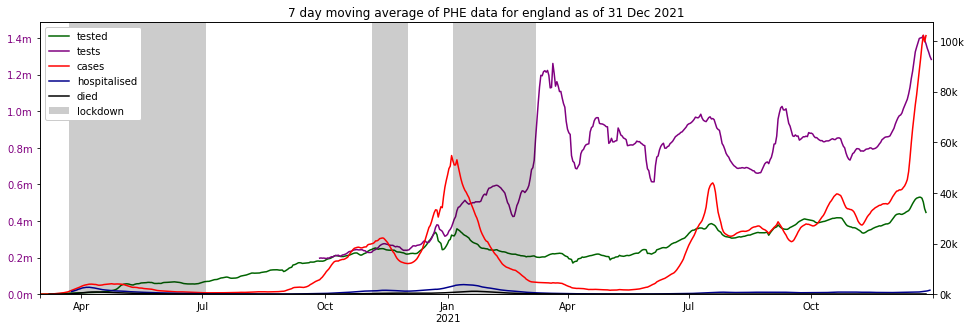

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.reported_virus_tests_sum), left_formatter=per1m_formatter,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

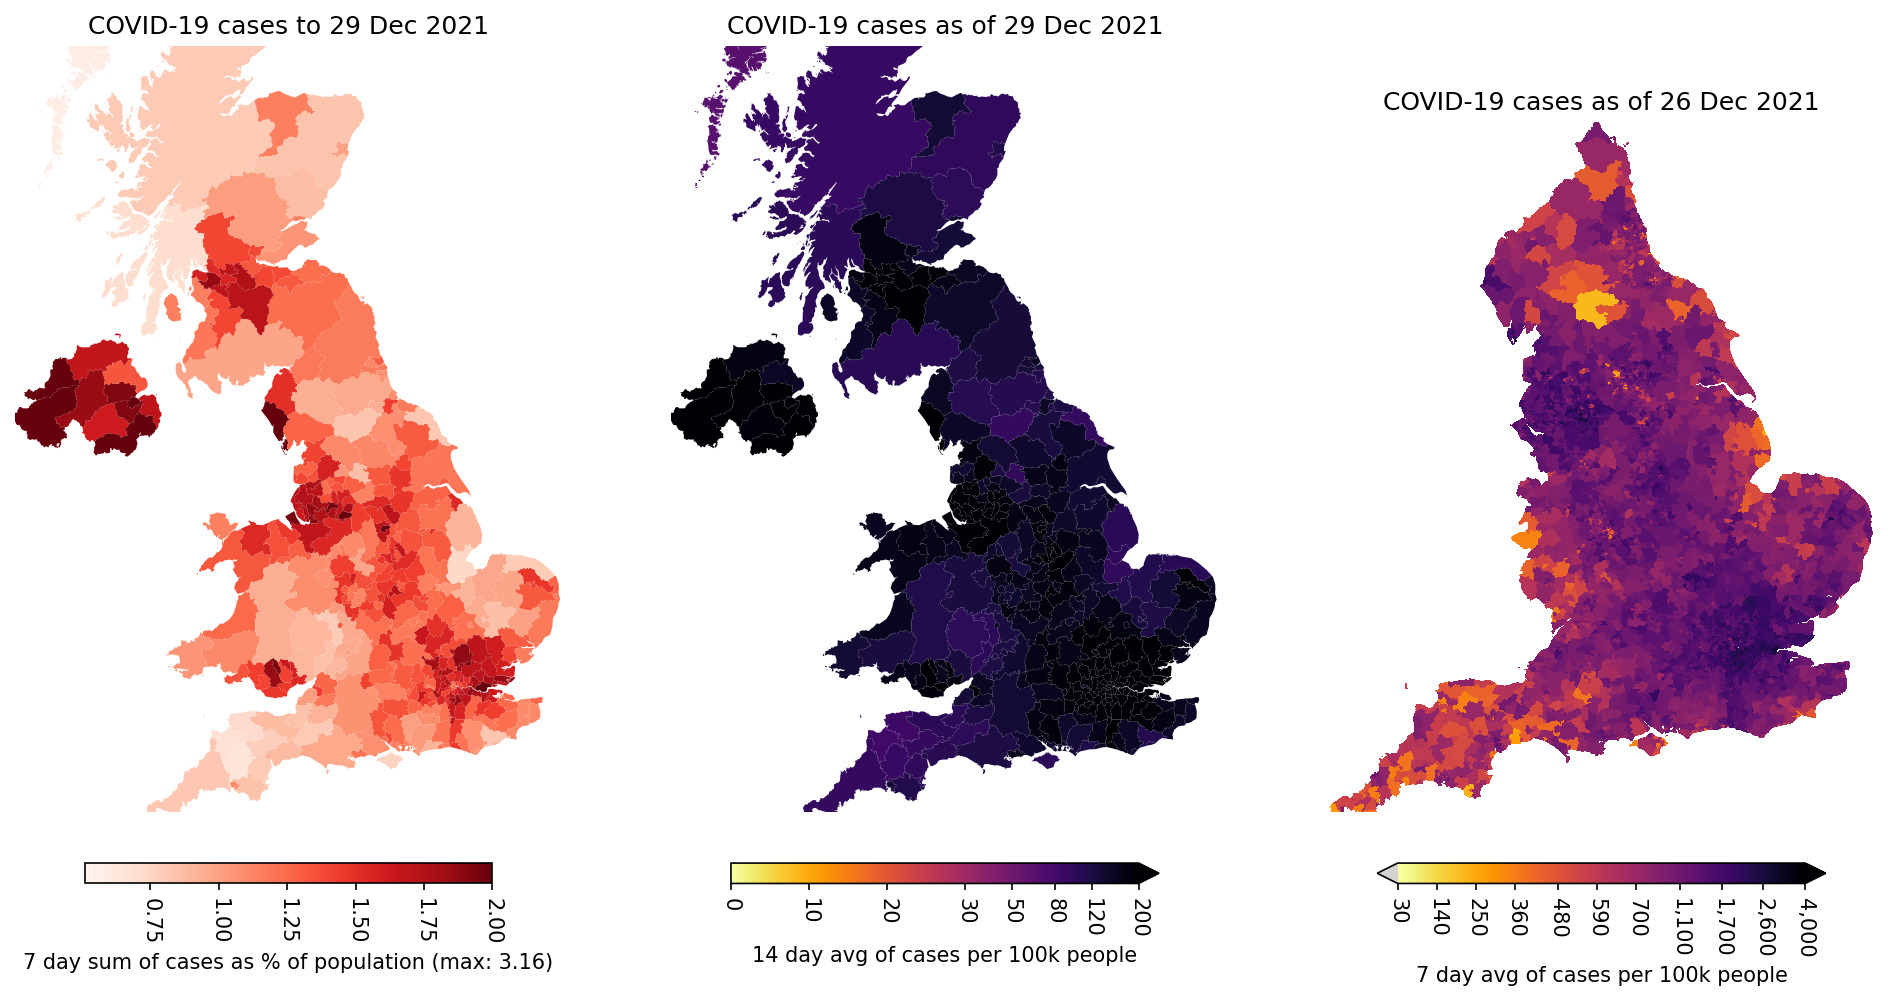

Loading BokehJS ...

In [17]:
case_maps(sum_vmax=2, exclude_days=1)